In [28]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [29]:
# 📂 Step 2: Load Dataset
df = pd.read_csv("/content/diabetes.csv")

In [30]:
# 🎯 Step 2: Split Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [31]:
# 👀 Step 3: Quick Look
print("Shape of data:", df.shape)
df.head()

Shape of data: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
# Check info
df.info()

# Check missing/null values
print(df.isnull().sum())

# Basic stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"🌲 Random Forest Accuracy: {rf_acc * 100:.2f}%")

🌲 Random Forest Accuracy: 74.68%


In [34]:
# ⚡ Step 3: Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"🚀 XGBoost Accuracy: {xgb_acc * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:10:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 XGBoost Accuracy: 73.38%


In [35]:
# 📊 Step 4: Compare Models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, rf_acc, xgb_acc]
})
print("\nModel Comparison:\n")
print(results)


Model Comparison:

                 Model  Accuracy
0  Logistic Regression  0.714286
1        Random Forest  0.746753
2              XGBoost  0.733766


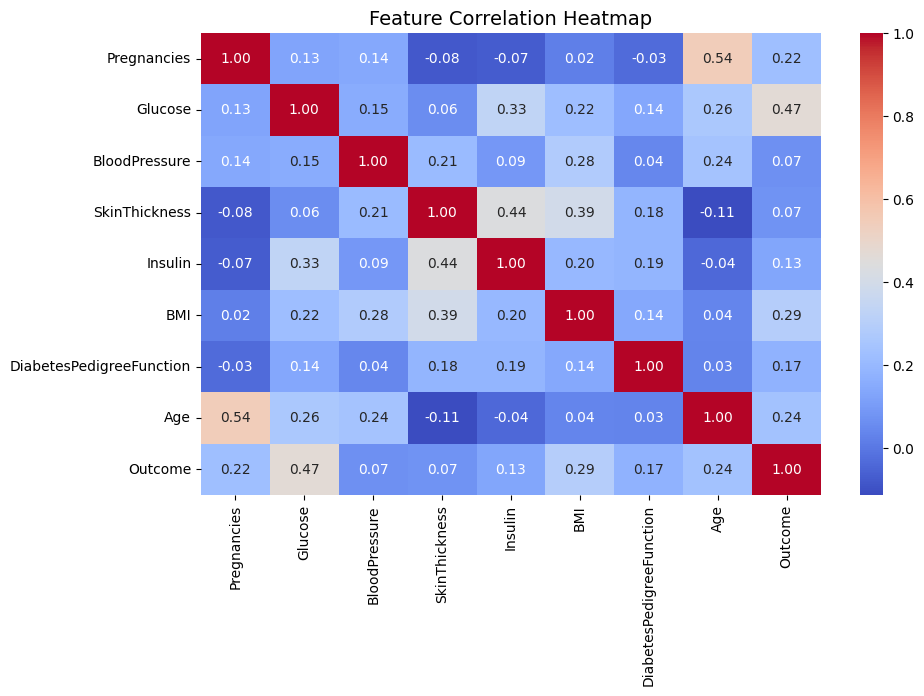

In [36]:
# 📊 Step 1: Correlation Heatmap (Feature relationships)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


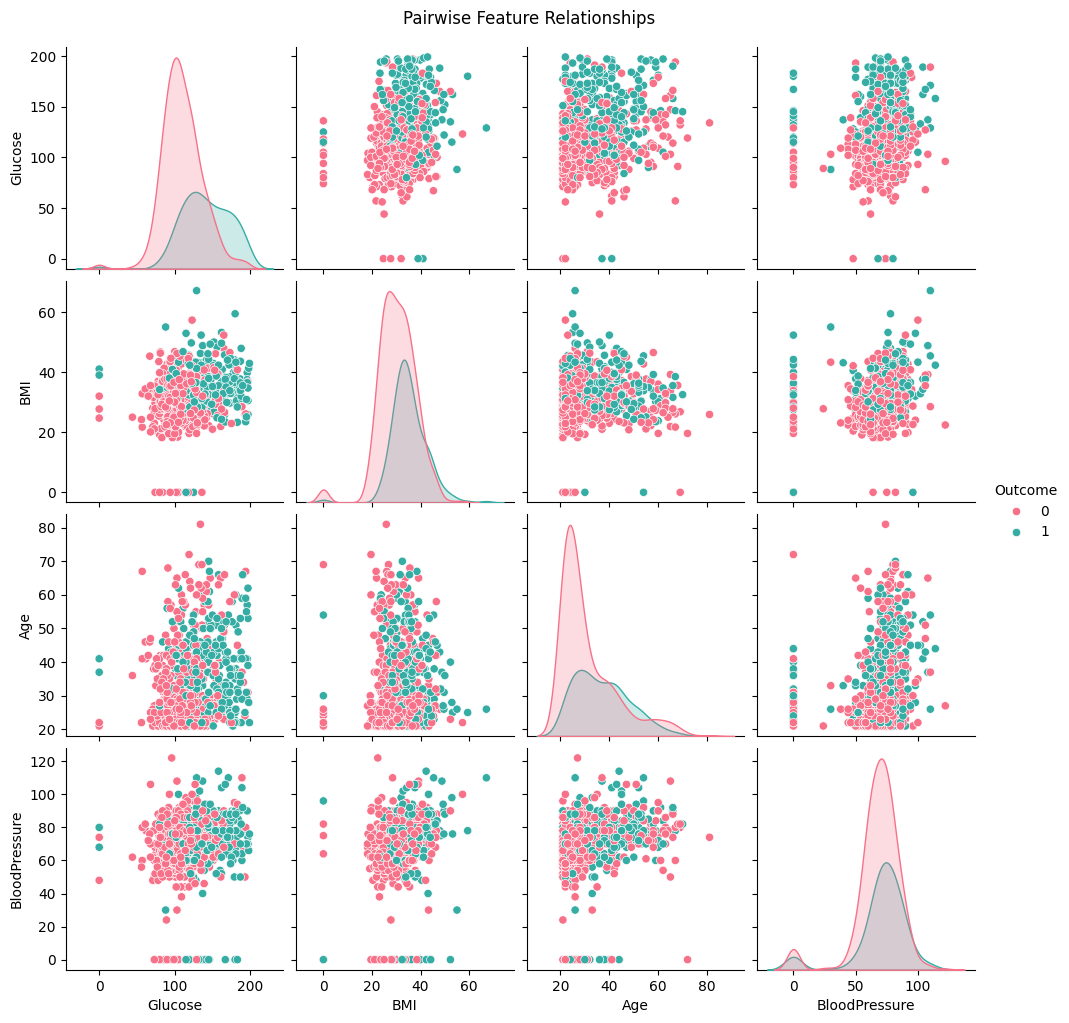

In [37]:
# 📈 Step 2: Pairplot for some important features
sns.pairplot(df[['Glucose','BMI','Age','BloodPressure','Outcome']], hue='Outcome', palette='husl')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

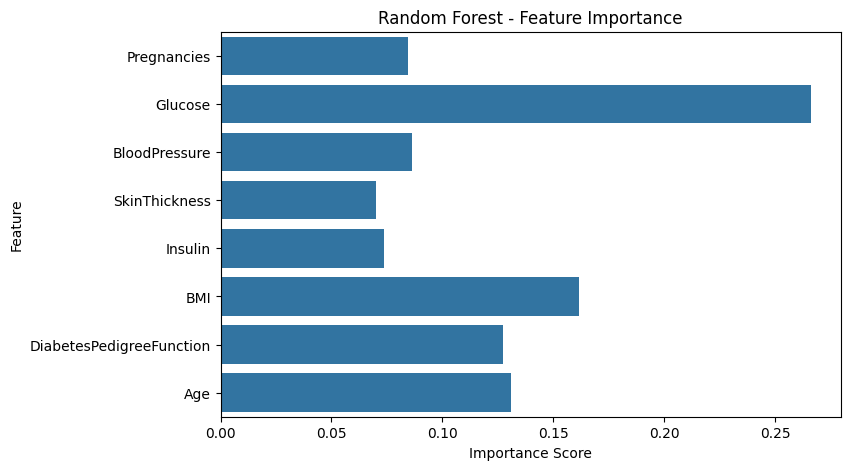

In [38]:
# 🌲 Step 3: Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, orient='h')
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

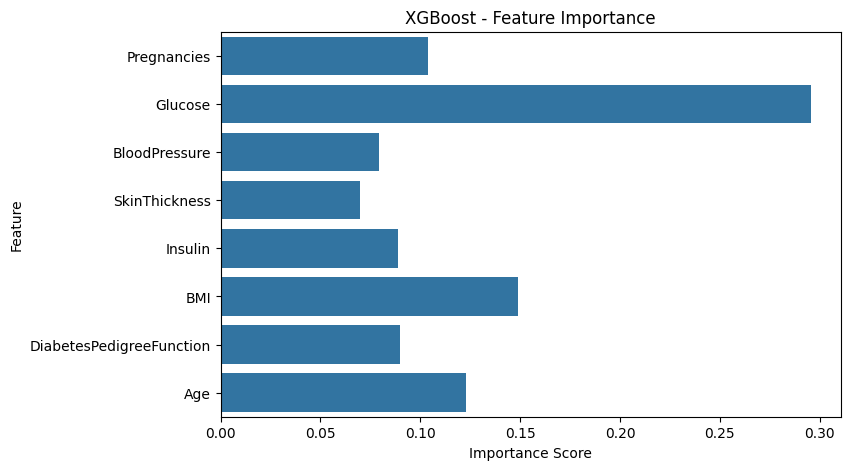

In [39]:
# ⚡ Step 4: Feature Importance from XGBoost
xgb_importances = xgb_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importances, y=features, orient='h')
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [40]:
import joblib

# 🧠 Choose the best model (XGBoost)
best_model = xgb_model

# 🎯 Save the trained model
joblib.dump(best_model, 'diabetes_model.pkl')

# 🎯 Save the scaler too (important for prediction)
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [ ]:
!pip install streamlit pyngrok


In [42]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# --- Page Setup ---
st.set_page_config(page_title="Diabetes Prediction App", layout="centered")
st.title("🩺 AI Diabetes Prediction App")
st.write("This app predicts the likelihood of a person having diabetes based on medical inputs. *(Educational Purpose Only)*")

# --- Load model and scaler ---
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

# --- Input fields ---
st.header("Enter Patient Details:")
col1, col2 = st.columns(2)

with col1:
    pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=2)
    glucose = st.number_input("Glucose Level", min_value=0, max_value=300, value=120)
    blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=70)
    skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)

with col2:
    insulin = st.number_input("Insulin Level", min_value=0, max_value=900, value=85)
    bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
    dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
    age = st.number_input("Age", min_value=1, max_value=120, value=33)

# --- Predict button ---
if st.button("🔍 Predict Diabetes Risk"):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[0][1]

    st.subheader("🔔 Prediction Result:")
    if prediction[0] == 1:
        st.error(f"⚠️ High Risk of Diabetes! (Probability: {probability*100:.2f}%)")
    else:
        st.success(f"✅ Low Risk of Diabetes (Probability: {probability*100:.2f}%)")

    st.caption("Disclaimer: This result is generated by a machine learning model and is not a medical diagnosis.")


Writing app.py
